In [1]:
import pandas as pd
import numpy as np

In [2]:
import torch
from transformers import RobertaForSequenceClassification, AutoTokenizer

model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)

C:\Users\Admin\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
sentence = 'Đây là mô_hình rất hay , phù_hợp với điều_kiện và như cầu của nhiều người .'

input_ids = torch.tensor([tokenizer.encode(sentence)])

with torch.no_grad():
    out = model(input_ids)
    print(out.logits.softmax(dim=-1).tolist())
    # Output:
    # [[0.002, 0.988, 0.01]]
    #     ^      ^      ^
    #    NEG    POS    NEU

[[0.0018411235651001334, 0.988153874874115, 0.010005034506320953]]


In [8]:
# Bước 1: Đọc file CSV
file_path = 'C:\Workplace\Projects\Data_Science_PTIT\data\comments_new.csv'
df = pd.read_csv(file_path)
print(df.head())
df['comment'] = df['comment'].fillna('')

   Unnamed: 0                                            comment   timestamp
0           0  ['Cốc cafe sáng xứng đáng chưa các PTITers ơi....  15/07/2024
1           1                    'Bất ngờ quá năm nay siêu sale'  27/09/2024
2           2   'Xin chúc mừng các bạn D24. Đừng quên follow ...  30/09/2024
3           3   'Đoàn thanh niên Học viện Công nghệ Bưu chính...  12/10/2024
4           4                       'Chúc mừng các bạn D24 PTIT'  31/07/2024


In [9]:
# Chuyển mô hình sang chế độ đánh giá
model.eval()

# Bước 3: Gán nhãn bằng mô hình PhoBERT
labels = {0: 'negative', 1: 'neutral', 2: 'positive'}  # Mapping nhãn

In [13]:
def classify_comment(comment):
    # Tokenize comment
    input_ids = torch.tensor([tokenizer.encode(comment)])

    # Không tính gradient
    with torch.no_grad():
        outputs = model(input_ids)

    # Lấy nhãn có giá trị cao nhất (0: negative, 1: neutral, 2: positive)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    # Trả về nhãn tương ứng
    return labels[predicted_label]

# Tạo cột 'label' và gán nhãn cho từng comment
df['label'] = df['comment'].apply(classify_comment)

In [14]:
# Bước 4: Lưu lại file CSV sau khi gán nhãn
df.to_csv('C:\Workplace\Projects\Data_Science_PTIT\data\comments_labeled.csv', index=False)
print("File đã được lưu với nhãn.")

File đã được lưu với nhãn.


In [15]:
df.head(20)

,Unnamed: 0,comment,timestamp,label
0,0,['Cốc cafe sáng xứng đáng chưa các PTITers ơi....,15/07/2024,neutral
1,1,'Bất ngờ quá năm nay siêu sale',27/09/2024,neutral
2,2,'Xin chúc mừng các bạn D24. Đừng quên follow ...,30/09/2024,neutral
3,3,'Đoàn thanh niên Học viện Công nghệ Bưu chính...,12/10/2024,neutral
4,4,'Chúc mừng các bạn D24 PTIT',31/07/2024,neutral
5,5,'Ai học báo chí khummm',26/08/2024,negative
6,6,'Van Anh chào nàng',05/09/2024,neutral
7,7,'Nguyen Anh Thơ hí',26/08/2024,positive
8,8,'Van Anh tớ',04/07/2024,neutral
9,9,'Thanh Mai',11/09/2024,positive


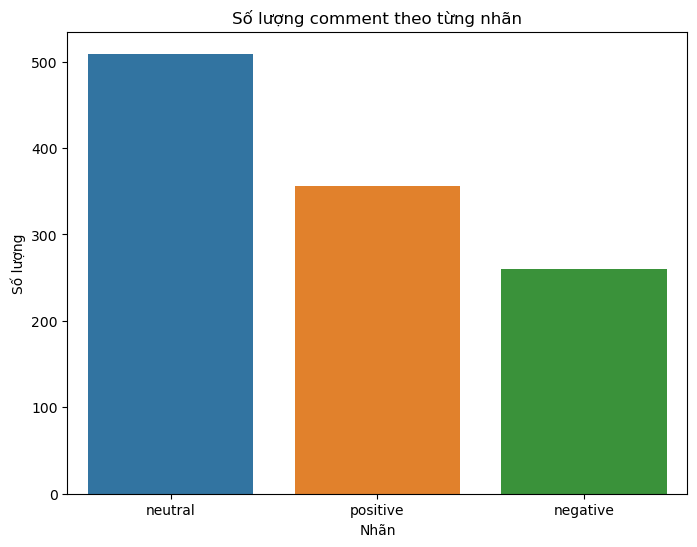

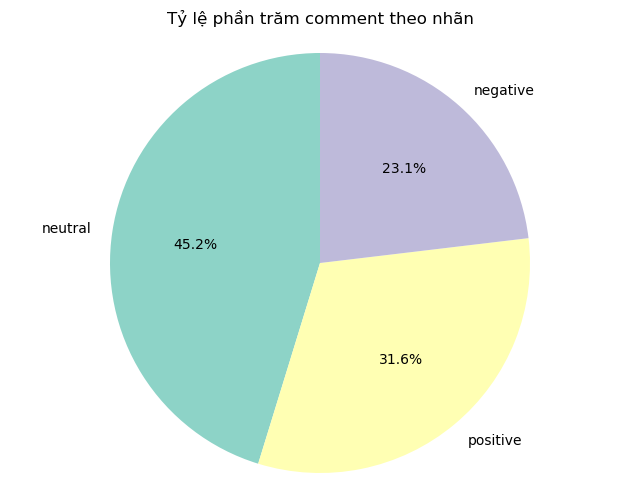

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 2: Đếm số lượng nhãn
label_counts = df['label'].value_counts()

# Bước 3: Vẽ biểu đồ cột (Bar chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Số lượng comment theo từng nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.show()

# Bước 4: Vẽ biểu đồ tròn (Pie chart)
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Tỷ lệ phần trăm comment theo nhãn')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

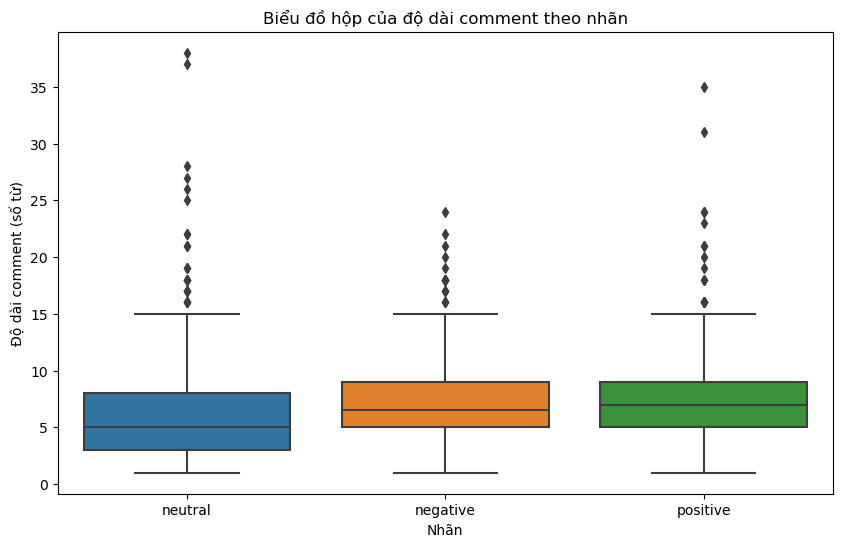

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Bước 2: Tính độ dài comment
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))  # Tính số từ trong comment

# Bước 3: Vẽ biểu đồ hộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='comment_length', data=df)
plt.title('Biểu đồ hộp của độ dài comment theo nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Độ dài comment (số từ)')
plt.show()


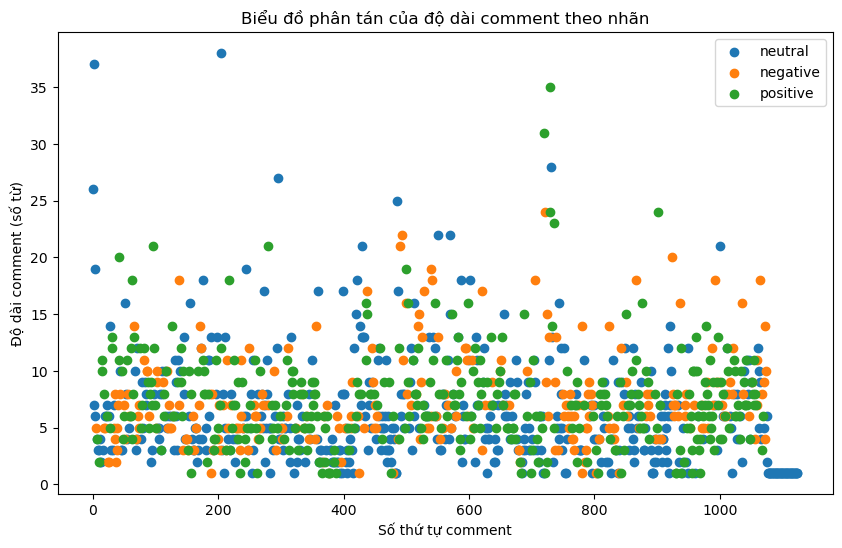

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 2: Tính độ dài comment
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))  # Tính số từ trong comment

# Bước 3: Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset.index, subset['comment_length'], label=label)

plt.title('Biểu đồ phân tán của độ dài comment theo nhãn')
plt.xlabel('Số thứ tự comment')
plt.ylabel('Độ dài comment (số từ)')
plt.legend()
plt.show()

# từ phần này là xử lý comment và huấn luyện mô hình dựa trên comment và nhãn là cột label


In [23]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Đảm bảo các công cụ cần thiết đã được tải xuống
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Đọc dữ liệu từ file CSV
file_path = 'C:\Workplace\Projects\Data_Science_PTIT\data\comments_labeled.csv'
df = pd.read_csv(file_path)

# Khởi tạo công cụ stemmer và lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Hàm chuẩn hóa văn bản
def preprocess_text(text):
    if isinstance(text, str):  # Chỉ xử lý nếu text là chuỗi
        # Chuyển thành chữ thường
        text = text.lower()
        # Loại bỏ ký tự đặc biệt và dấu câu
        text = re.sub(r'[^\w\s]', '', text)
        # Tách từ
        words = nltk.word_tokenize(text)
        # Xóa stopwords và thực hiện stemming và lemmatization
        words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ""  # Trả về chuỗi rỗng nếu không phải chuỗi

# Áp dụng hàm chuẩn hóa cho cột 'comments'
df['comment'] = df['comment'].apply(preprocess_text)

# Lưu dữ liệu đã xử lý vào file mới nếu cần
df.to_csv('C:\Workplace\Projects\Data_Science_PTIT\data\comment_processed.csv', index=False)

# Hiển thị kết quả chuẩn hóa
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Unnamed: 0                                            comment   timestamp  \
0           0  cốc cafe sáng xứng đáng chưa các ptiter ơi chú...  15/07/2024   
1           1                      bất ngờ quá năm nay siêu sale  27/09/2024   
2           2  xin chúc mừng các bạn d24 đừng quên follow fan...  30/09/2024   
3           3  đoàn thanh niên học viện công nghệ bưu chính v...  12/10/2024   
4           4                         chúc mừng các bạn d24 ptit  31/07/2024   

     label  
0  neutral  
1  neutral  
2  neutral  
3  neutral  
4  neutral  


In [24]:
df.head(30)

,Unnamed: 0,comment,timestamp,label
0,0,cốc cafe sáng xứng đáng chưa các ptiter ơi chú...,15/07/2024,neutral
1,1,bất ngờ quá năm nay siêu sale,27/09/2024,neutral
2,2,xin chúc mừng các bạn d24 đừng quên follow fan...,30/09/2024,neutral
3,3,đoàn thanh niên học viện công nghệ bưu chính v...,12/10/2024,neutral
4,4,chúc mừng các bạn d24 ptit,31/07/2024,neutral
5,5,ai học báo chí khummm,26/08/2024,negative
6,6,van anh chào nàng,05/09/2024,neutral
7,7,nguyen anh thơ hí,26/08/2024,positive
8,8,van anh tớ,04/07/2024,neutral
9,9,thanh mai,11/09/2024,positive


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
file_path = 'C:\Workplace\Projects\Data_Science_PTIT\data\comment_processed.csv'  # Thay bằng đường dẫn thực tế của bạn
df = pd.read_csv(file_path)

# Loại bỏ các hàng có giá trị NaN trong cột 'comments' hoặc 'label'
df.dropna(subset=['comments', 'label'], inplace=True)

# Chuẩn bị dữ liệu
X = df['comment']  # Cột dữ liệu comments đã được xử lý
y = df['label']     # Cột nhãn (label)

# Mã hóa nhãn từ chuỗi sang số (encoding labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Chuyển 'positive', 'negative', 'neutral' thành số

# Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Mã hóa dữ liệu văn bản bằng TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Xây dựng mô hình softmax regression (multinomial logistic regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_tfidf)

# Đánh giá mô hình
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Hiển thị confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


FileNotFoundError: [Errno 2] No such file or directory: 'KHDL_Dataset/demo_processed.csv'

In [ ]:
# Câu cần dự đoán
new_comment = "câi sưa còn ổn khum"

# Bước 1: Chuẩn hóa câu "Trường đẹp quá"
def preprocess_text(text):
    # Giả định tiếng Việt, nên không cần stemming hoặc lemmatization
    text = text.lower()  # Chuyển thành chữ thường
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ dấu câu
    words = nltk.word_tokenize(text)  # Tách từ
    words = [word for word in words if word not in stop_words]  # Xóa stopwords
    return ' '.join(words)

# Chuẩn hóa văn bản
processed_comment = preprocess_text(new_comment)

# Bước 2: Mã hóa câu đã chuẩn hóa bằng TF-IDF
new_comment_tfidf = tfidf.transform([processed_comment])

# Bước 3: Dự đoán nhãn bằng mô hình đã huấn luyện
predicted_label = model.predict(new_comment_tfidf)

# Chuyển nhãn từ số sang chuỗi
predicted_label_text = label_encoder.inverse_transform(predicted_label)

# In kết quả dự đoán
print(f"Comment: {new_comment}")
print(f"Predicted Sentiment: {predicted_label_text[0]}")


Comment: câi sưa còn ổn khum
Predicted Sentiment: neutral
